# 3. Detecting facial expressions from videos

*Written by Jin Hyun Cheong and Eshin Jolly*

In this tutorial we'll explore how to use the `Detector` class to process video files. You can try it out interactively in Google Collab: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cosanlab/py-feat/blob/master/notebooks/content/03_detector_vids.ipynb)

In [ ]:
# Uncomment the line below and run this only if you're using Google Collab
# !pip install -q py-feat

## 3.1 Setting up the Detector

We'll begin by creating a new `Detector` instance just like the previous tutorial

In [1]:
from feat import Detector

face_model = "img2pose"
landmark_model = "mobilenet"
au_model = "logistic"
emotion_model = "fer"
facepose_model = "img2pose"
detector = Detector(
    face_model=face_model,
    landmark_model=landmark_model,
    au_model=au_model,
    emotion_model=emotion_model,
    facepose_model=facepose_model,
)

detector

feat.detector.Detector(face_model=img2pose, landmark_model=mobilenet, au_model=logistic, emotion_model=fer, facepose_model=img2pose)

## 3.2 Processing videos 

Detecting facial expressions in videos is easy to do using the `.detect_video()` method. This sample video included in Py-Feat is by [Wolfgang Langer](https://www.pexels.com/@wolfgang-langer-1415383?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels) from [Pexels](https://www.pexels.com/video/a-woman-exhibits-different-emotions-through-facial-expressions-3063838/).

In [3]:
from feat.utils import get_test_data_path
import os

test_data_dir = get_test_data_path()
test_video_path = os.path.join(test_data_dir, "WolfgangLanger_Pexels.mp4")

# Show video
from IPython.core.display import Video
Video(test_video_path, embed=False)

Just like `.detect_image()` we can just pass the path to the video file to `.detect_video()`. Here we also set `skip_frames=24` which tells the detector to process only every 24th frame for the sake of speed:

In [4]:
video_prediction = detector.detect_video(test_video_path, skip_frames=24)
video_prediction.head()

/Users/Esh/anaconda3/envs/py-feat/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


,frame,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,...,Roll,Yaw,anger,disgust,fear,happiness,sadness,surprise,neutral,input
0,0,323.0,47.0,235.0,312.0,0.977491,329.818599,331.513555,336.909851,345.183024,...,-4.564205,12.390767,0.002018,0.018192,0.005437,0.034181,0.696459,0.000493,0.243219,/Users/Esh/Documents/pypackages/py-feat/feat/t...
24,24,343.0,48.0,230.0,304.0,0.977991,328.496018,330.304015,335.883435,344.498012,...,-3.138013,14.580695,0.001995,0.016118,0.003679,0.034418,0.703625,0.000386,0.239779,/Users/Esh/Documents/pypackages/py-feat/feat/t...
48,48,328.0,40.0,225.0,292.0,0.971741,345.200711,344.966938,347.419899,353.269677,...,2.12017,3.003316,0.000548,0.007883,0.046914,0.007481,0.927664,0.000503,0.009008,/Users/Esh/Documents/pypackages/py-feat/feat/t...
72,72,307.0,62.0,229.0,297.0,0.962885,342.008343,339.981409,340.39401,343.114834,...,1.996875,6.923225,0.001442,0.0181,0.022749,0.006169,0.941736,0.000096,0.009708,/Users/Esh/Documents/pypackages/py-feat/feat/t...
96,96,323.0,77.0,235.0,282.0,0.959169,318.377872,319.086352,322.283817,327.20627,...,-0.717578,6.199114,0.007379,0.024216,0.035421,0.001486,0.925043,0.000308,0.006147,/Users/Esh/Documents/pypackages/py-feat/feat/t...


We can see that our 20s long video, recorded at 24 frames-per-second, produces 20 predictions because we set `skip_frames=24`: 

In [5]:
video_prediction.shape

(20, 173)

## 3.3 Visualizing predictions

You can also plot the detection results from a video. The frames are not extracted from the video (that will result in thousands of images) so the visualization only shows the detected face without the underlying image.

The video has 24 fps and the actress show sadness around the 0:02, and happiness at 0:14 seconds.

[<Figure size 1080x504 with 3 Axes>, <Figure size 1080x504 with 3 Axes>]

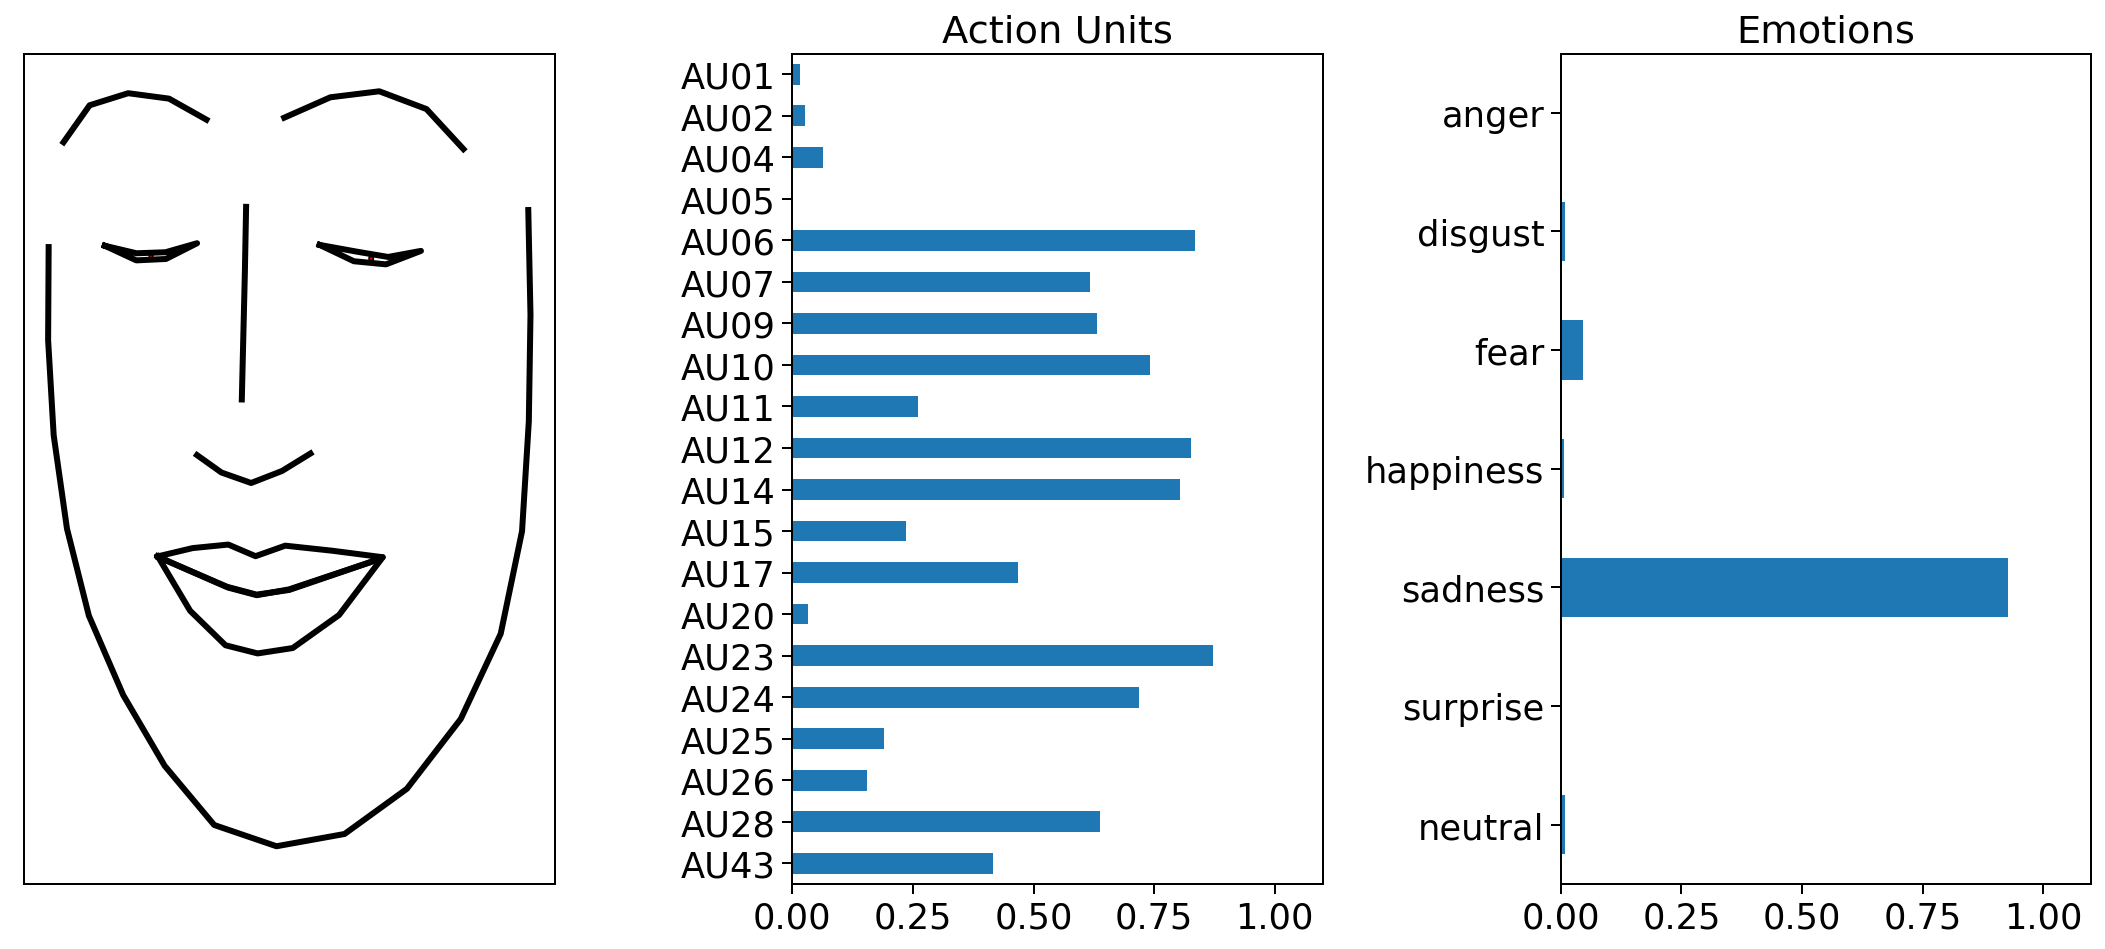

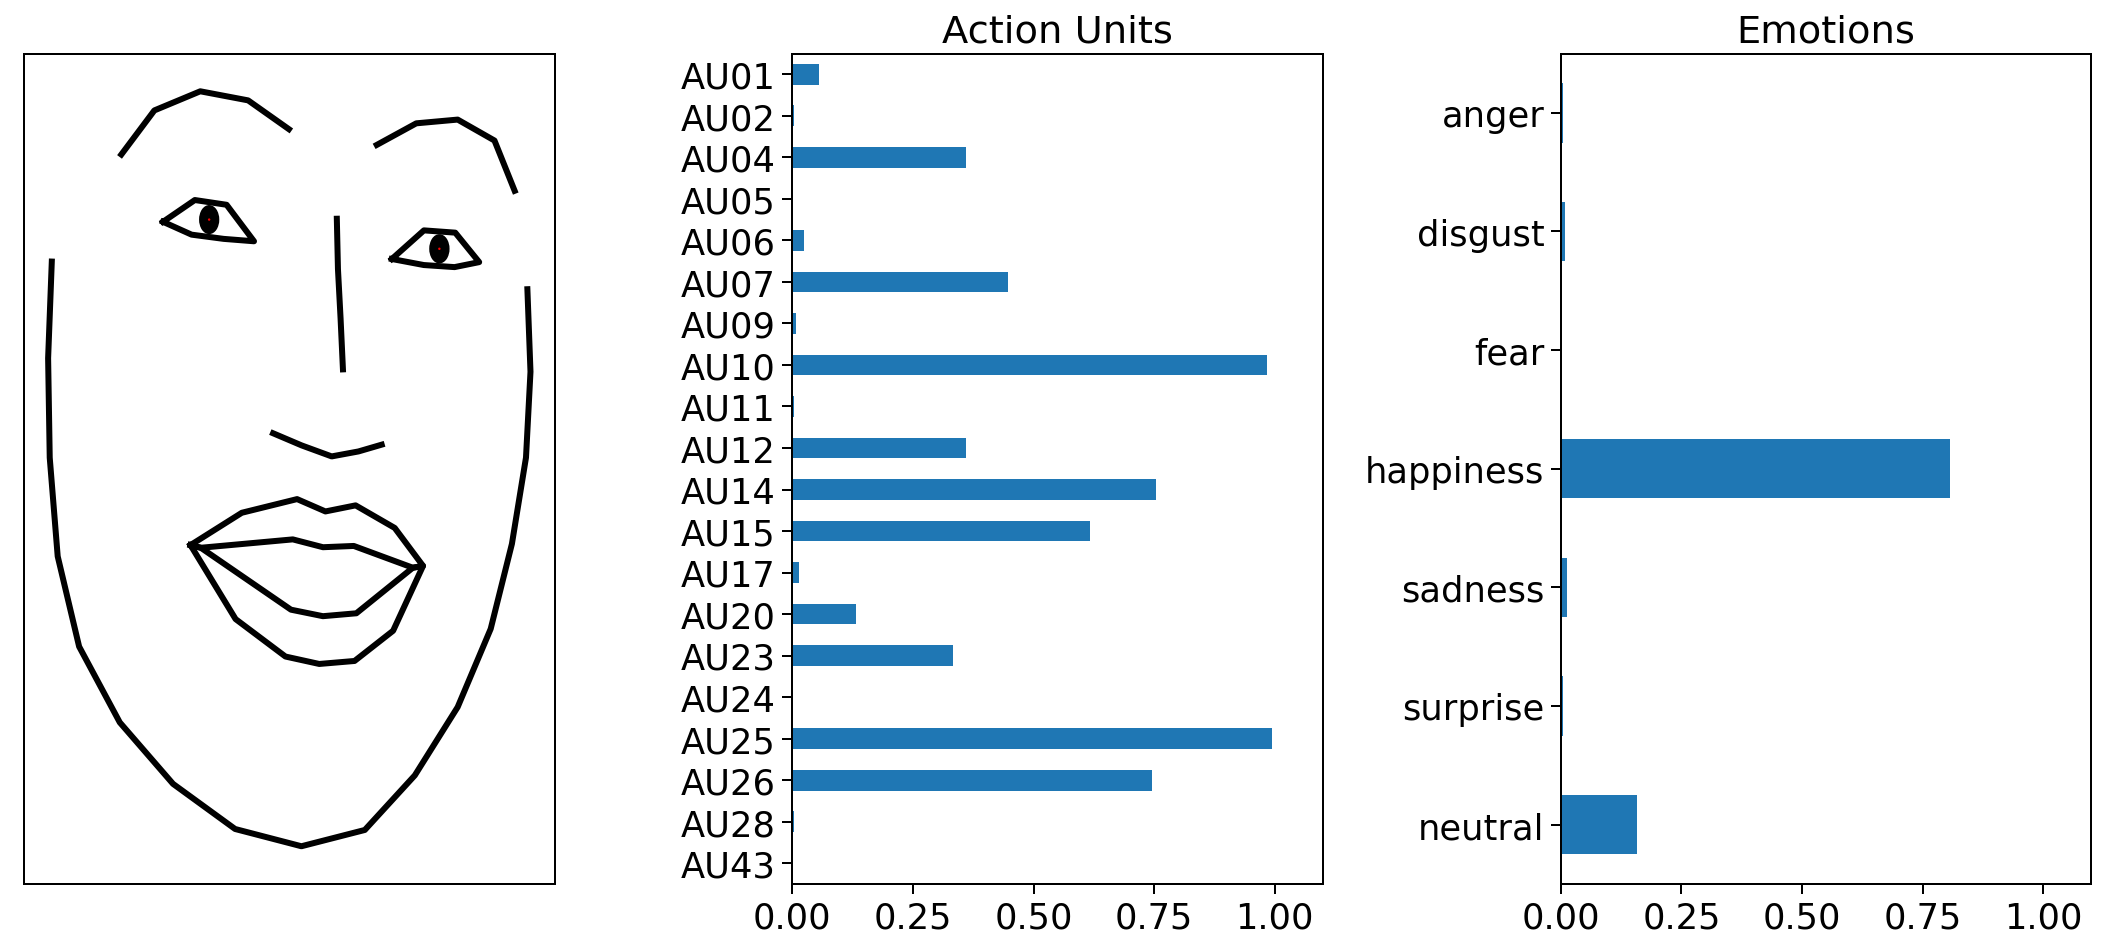

In [6]:
# Frame 48 = ~0:02
# Frame 408 = ~0:14
# Frame numbers are the index so we can use .loc
video_prediction.loc[[48, 408]].plot_detections(faceboxes=False, add_titles=False)

We can also leverage existing pandas plotting functions to show how emotions unfold over time. We can clearly see how her emotions change from sadness to happiness.

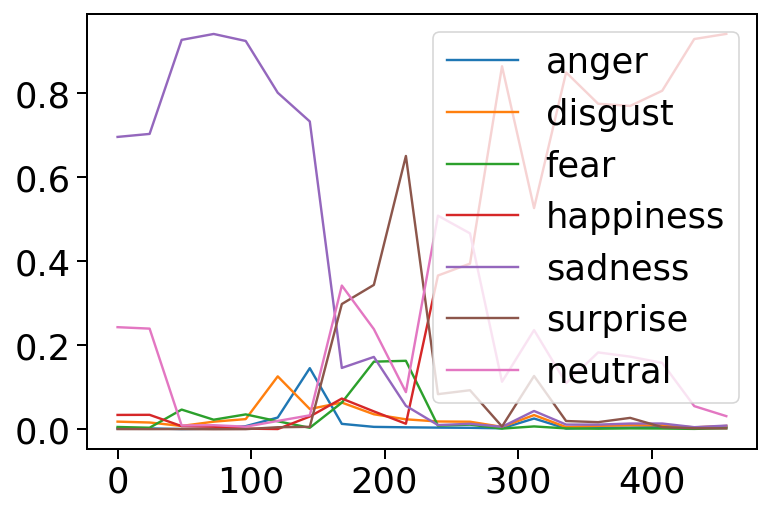

In [7]:
axes = video_prediction.emotions.plot()

In situations you want to predict EVERY frame of the video, you can ust leave out the `skip_frames` argument. Speed of processing may vary depending on the detector you use and the length of the video:

In [ ]:
# Run me to get a prediction for EVERY video frame.
# WARNING MAY TAKE A WHILE!
video_prediction = detector.detect_video(test_video_path)